In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 206.0 MB/s eta 0:00:0000:01
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.2.0
    Uninstalling fsspec-2025.2.0:
      Successfully uninstalled fsspec-2025.2.0
  Attempting uninstall: dill
    Found existing installation: dill 0.3.9
    Uninstalling dill-0.3.9:
      Successfully uninstalled dill-0.3.9


In [9]:
# Prepare some Countdown data

from datasets import load_dataset

ds = load_dataset("Jiayi-Pan/Countdown-Tasks-3to4")

In [10]:
ds

DatasetDict({
    train: Dataset({
        features: ['target', 'nums'],
        num_rows: 490364
    })
})

In [11]:

# f"Using the numbers {nums}, create an equation that equals {target}. You can use basic arithmetic operations (+, -, *, /) one or multiple times but each number can only be used once. Show your work in <think> </think> tags. And return the final equation in <answer> </answer> tags, for example <answer>\\boxed{{(1 + 2) / 3}}</answer>. Think step by step inside <think> tags."


In [12]:
dataset_list = [
    [
        {
            "from": "human",
            "value": (
                f"Using the numbers {row['nums']}, create an equation that equals {row['target']}. "
                "You can use basic arithmetic operations (+, -, *, /) one or multiple times but each number can only be used once. "
                "Show your work in <think> </think> tags. And return the final equation in <answer> </answer> tags, "
                "for example <answer> (1 + 2) / 3 </answer>. Think step by step inside <think> tags."
            )
        },
        {
            "from": "assistant",
            "ground_truth": {
                "value": f"{row['target']}"
            },
            "nums": {
                "value": f"{row['nums']}"
            }
        }
    ]
    for row in ds["train"]
]


In [13]:
print(dataset_list[0][0]['value'])

Using the numbers [44, 19, 35], create an equation that equals 98. You can use basic arithmetic operations (+, -, *, /) one or multiple times but each number can only be used once. Show your work in <think> </think> tags. And return the final equation in <answer> </answer> tags, for example <answer> (1 + 2) / 3 </answer>. Think step by step inside <think> tags.


In [15]:
import json

with open('/data/users/kevihuang/projects/Open-Reasoner-Zero/data/countdown-tasks-3to4_first_5000.json', 'w') as f:
    json.dump(dataset_list[:5000], f, indent=2)

# Prepare Query Data

In [3]:
# Prepare some Countdown data

from datasets import load_dataset

ds = load_dataset("khuang2/math-query-gen-prompts-w-solution") #khuang2/math-query-gen-prompts") #"khuang2/Countdown-Tasks-3to4-query-gen-prompts")

/data/users/kevihuang/projects/Open-Reasoner-Zero/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|██████████| 50000/50000 [00:00<00:00, 315059.41 examples/s]


In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['prompt'],
        num_rows: 50000
    })
})

In [5]:
ds['train'][0]

{'prompt': "<|im_start|>system\nYou are Qwen, created by Alibaba Cloud. You are a helpful assistant.<|im_end|>\n<|im_start|>user\nGiven the assistant goal, task generation success criteria, and example final answer, generate a task that fulfills the task generation success criteria. The generated task should be:\n\n1) maximizing user benefit and helpfulness and minimizing user risk, harm, and unwanted outcomes\n\n2) novel - avoid designing a task that is drawn from the same linguistic templates or differ only in superficial details\n\n3) difficult yet tractable - the task should be challenging for the assistant to complete, without being completely intractable\n\n4) clear - the task should be specific enough to not require further user input to understand what is being asked of the assistant and should provide all the context and detail necessary\n\nShow your work in <think> </think> tags. And return the task and final answer in <answer> </answer> tags.\n\n\nAssistant Goal: Get really 

In [6]:
prompt = ds['train'][0]['prompt']
print(prompt.split("<|im_start|>user")[1].split("<|im_end|>")[0].strip().replace("×", "*").replace("÷", "/"))

Given the assistant goal, task generation success criteria, and example final answer, generate a task that fulfills the task generation success criteria. The generated task should be:

1) maximizing user benefit and helpfulness and minimizing user risk, harm, and unwanted outcomes

2) novel - avoid designing a task that is drawn from the same linguistic templates or differ only in superficial details

3) difficult yet tractable - the task should be challenging for the assistant to complete, without being completely intractable

4) clear - the task should be specific enough to not require further user input to understand what is being asked of the assistant and should provide all the context and detail necessary

Show your work in <think> </think> tags. And return the task and final answer in <answer> </answer> tags.


Assistant Goal: Get really good at math.

Task Generation Success Criteria: The task and final answer must be a dictionary with 'prompt', 'target', and 'solution' keys. T

In [7]:
# countdown_prompt = '''Given the assistant goal, task generation success criteria, and example final answer, generate a task that fulfills the task generation success criteria. The generated task should be:

# 1) maximizing user benefit and helpfulness and minimizing user risk, harm, and unwanted outcomes

# 2) novel - avoid designing a task that is drawn from the same linguistic templates or differ only in superficial details

# 3) difficult yet tractable - the task should be challenging for the assistant to complete, without being completely intractable

# 4) clear - the task should be specific enough to not require further user input to understand what is being asked of the assistant and should provide all the context and detail necessary

# Show your work in <think> </think> tags. And return the task and final answer in <answer> </answer> tags.


# Assistant Goal: Get really good at the Countdown Game with 3 to 4 numbers. The Countdown game is a numbers puzzle where players use a set of randomly drawn numbers and basic arithmetic operations (+, -, *, /) to reach a target number.

# Task Generation Success Criteria: The task and final answer must be a dictionary with the 'target', 'nums', and 'prompt' keys. The 'target' key should have a value that is an integer, the 'nums' key should have a value that is a list of 3 or 4 integers, and the 'prompt' key should have a value that is a string in the same exact format as the example final answer prompt, but just with the nums and target updated as appropriate.

# Example Final Answer: <answer>
# {
#     'target': 44,
#     'nums': [6, 77, 73, 20],
#     'prompt': 'Using the numbers [6, 77, 73, 20], create an equation that equals 44. You can use basic arithmetic operations (+, -, *, /) one or multiple times but each number can only be used once. Show your work in <think> </think> tags. And return the final equation in <answer> </answer> tags, for example <answer> (1 + 2) / 3 </answer>. Think step by step inside <think> tags.'
# }
# </answer>'''

# print(countdown_prompt)

In [8]:
dataset_list = [
    [
        {
            "from": "human",
            "value": prompt.split("<|im_start|>user")[1].split("<|im_end|>")[0].strip().replace("×", "*").replace("÷", "/").replace("Show your work in <think> </think> tags. And return the final equation in <answer> </answer> tags, for example <answer> (1 + 2) / 3 </answer>. Think step by step inside <think> tags.", "").replace("Show your work in <think> </think> tags. And return the task and final answer in <answer> </answer> tags.\n\n\n", "").replace("Example Final Answer: <answer>", "Example Reasoning and Final Answer Response Format: <think>\nreasoning process here\n</think>\n<answer>").replace("[6, 77, 73, 20]", "[1, 2, 3]").replace("44", "6") # having the prompt include the formatting is confusing for the query network when we're using a base model (formatting is always wrong) # countdown_prompt
        },
        {
            "from": "assistant",
            "ground_truth": {
                "value": ""
            }
        }
    ]
    for row in ds["train"]
]
len(dataset_list)

50000

In [9]:
print(dataset_list[0][0]['value'])

Given the assistant goal, task generation success criteria, and example final answer, generate a task that fulfills the task generation success criteria. The generated task should be:

1) maximizing user benefit and helpfulness and minimizing user risk, harm, and unwanted outcomes

2) novel - avoid designing a task that is drawn from the same linguistic templates or differ only in superficial details

3) difficult yet tractable - the task should be challenging for the assistant to complete, without being completely intractable

4) clear - the task should be specific enough to not require further user input to understand what is being asked of the assistant and should provide all the context and detail necessary

Assistant Goal: Get really good at math.

Task Generation Success Criteria: The task and final answer must be a dictionary with 'prompt', 'target', and 'solution' keys. The 'prompt' should be a math problem, the 'target' should be the expected answer to the math problem, and th

In [14]:
import json

with open('/data/users/kevihuang/projects/Open-Reasoner-Zero/data/math-query-gen-prompts_first_5000_w_solution.json', 'w') as f:
    json.dump(dataset_list[:5000], f, indent=2)

# Inspect Query Parsing

In [1]:
query_item = r'''{
    'prompt': "Find the equation of the curve (f(x)), which is the orthogonal trajectory of the given family of curves: x^2 + y^2 = 2cy",
    'target': 0.0,
    'solution': "Step 1: Find the slope of the given family of curves

Rewriting the equation of the family of curves:

\(y^2 - 2c y + x^2 = 0\)

Let \(y = f(x)\) and we're going to differentiate both sides with respect to x.

Step 2: Implicit differentiation

\(2y \frac{dy}{dx} - 2c + 2x \frac{dy}{dx} = 0\)

2y \frac{dy}{dx} + 2x \frac{dy}{dx} = 2c

\(\frac{dy}{dx} (2y + 2x) = 2c\)

Step 3: Find slope of orthogonal trajectories

The slope of the orthogonal trajectory is the negative reciprocal of the slope of the family of curves.

\(\frac{dy}{dx} = -\frac{1}{f'(x)} = -\frac{1}{\frac{2c}{2y + 2x}} = -\frac{y + x}{c}\)

Step 4: Derive the equation of the orthogonal trajectory

Using the slope found in step 3, we are going to substitute it into the equation \(y = f(x)\) to find the equation of the orthogonal trajectory.

Solution: \(x^2 + y^2 - 2c + 2xy = 0\)"
}'''

In [2]:
import re, ast

def fix_multiline_string(dict_str):
    # Match keys 'prompt' or 'solution' and capture their values
    pattern = r"('(?:prompt|solution)':\s*)(['\"])(.*?)(\2)"
    def replacer(match):
        start, content, end = match.groups()
        fixed_content = content.replace('\n', '\\n')
        return f"{start}{fixed_content}{end}"
    return re.sub(pattern, replacer, dict_str, flags=re.DOTALL)

def extract_answer_input(query_item):
    system_prefix = "A conversation between User and Assistant. The User asks a question, and the Assistant solves it. The Assistant first thinks about the reasoning process in the mind and then provides the User with the answer.\nThe reasoning process is enclosed within <think> </think> and answer is enclosed within <answer> </answer> tags, i.e. your response format should be: <think> reasoning process here </think>\n\n<answer> answer here </answer>. User: You must put your answer inside <answer> </answer> tags, i.e., <answer> answer here </answer>.\nThis is the problem:\n"
    assistant_suffix = " Show your work in <think> </think> tags. And return the final answer in <answer> </answer> tags, for example <answer> answer here </answer>. Think step by step inside <think> tags.\nAssistant: <think>" # Give example final answer to help policy model understand output better

    # TODO: adjust these default values based on domain / dataset! Pull from example final answer from prompt
    default_prompt = "What is 1 + 2?"
    default_extras = {'target': 3, 'valid_prompt': False, 'answer': 3, 'diverse': False}
    required_keys = {"target", "prompt"}
    
    default_full_prompt = system_prefix + default_prompt + assistant_suffix
    default_valid_answer_input = (
        default_full_prompt,
        default_extras
    )
    
    try:
        dict_str = query_item            # Content inside <answer>...</answer>
        dict_str_fixed = fix_multiline_string(dict_str)
        answer_input = ast.literal_eval(dict_str_fixed)
        if not isinstance(answer_input, dict) or not required_keys.issubset(answer_input.keys()):
            return default_valid_answer_input
        prompt_text = str(answer_input.get('prompt')).strip()
        full_prompt = system_prefix + prompt_text + assistant_suffix
        answer_input['prompt'] = full_prompt
        answer_input['target'] = str(float(answer_input.get('target'))) # don't force to be an int unless for countdown
        answer_input['answer'] = answer_input['target']
        answer_input['nums'] = [int(x) for x in answer_input.get('nums', [])]

        answer_input['valid_prompt'] = True
        return (full_prompt, answer_input)
    except Exception as e:
        return default_valid_answer_input

In [ ]:
extract_answer_input(query_item)

('A conversation between User and Assistant. The User asks a question, and the Assistant solves it. The Assistant first thinks about the reasoning process in the mind and then provides the User with the answer.\nThe reasoning process is enclosed within <think> </think> and answer is enclosed within <answer> </answer> tags, i.e. your response format should be: <think> reasoning process here </think>\n\n<answer> answer here </answer>. User: You must put your answer inside <answer> </answer> tags, i.e., <answer> answer here </answer>.\nThis is the problem:\nWhat is 1 + 2? Show your work in <think> </think> tags. And return the final answer in <answer> </answer> tags, for example <answer> answer here </answer>. Think step by step inside <think> tags.\nAssistant: <think>',
 {'target': 3, 'valid_prompt': False, 'answer': 3, 'diverse': False})

In [1]:
query_item = r'''{
  'prompt': "Calculate the sum of the first 200 prime numbers",
  'target': 2150,
  'solution': "The sum of the first 200 prime numbers is 2150."
}'''


import re, ast

def fix_multiline_string(dict_str):
    # Match keys 'prompt' or 'solution' and capture their values
    pattern = r"((?:'prompt'|\"prompt\"|'solution'|\"solution\")\s*:\s*)(['\"])(.*?)(\2)"
    def replacer(match):
        start, quote, content, _ = match.groups()
        fixed_content = content.replace('\n', '\\n')
        return f"{start}{quote}{fixed_content}{quote}"
    return re.sub(pattern, replacer, dict_str, flags=re.DOTALL)

def extract_answer_input(query_item):
    system_prefix = "A conversation between User and Assistant. The User asks a question, and the Assistant solves it. The Assistant first thinks about the reasoning process in the mind and then provides the User with the answer.\nThe reasoning process is enclosed within <think> </think> and answer is enclosed within <answer> </answer> tags, i.e. your response format should be: <think> reasoning process here </think>\n\n<answer> answer here </answer>. User: You must put your answer inside <answer> </answer> tags, i.e., <answer> answer here </answer>.\nThis is the problem:\n"
    assistant_suffix = " Show your work in <think> </think> tags. And return the final answer in <answer> </answer> tags, for example <answer> answer here </answer>. Think step by step inside <think> tags.\nAssistant: <think>" # Give example final answer to help policy model understand output better

    # TODO: adjust these default values based on domain / dataset! Pull from example final answer from prompt
    default_prompt = "What is 1 + 2?"
    default_extras = {'target': 3, 'valid_prompt': False, 'answer': 3, 'diverse': False}
    required_keys = {"target", "prompt"}
    
    default_full_prompt = system_prefix + default_prompt + assistant_suffix
    default_valid_answer_input = (
        default_full_prompt,
        default_extras
    )
    
    try:
        dict_str = query_item            # Content inside <answer>...</answer>
        dict_str_fixed = fix_multiline_string(dict_str)
        answer_input = ast.literal_eval(dict_str_fixed)
        if not isinstance(answer_input, dict) or not required_keys.issubset(answer_input.keys()):
            return default_valid_answer_input
        prompt_text = str(answer_input.get('prompt')).strip()
        full_prompt = system_prefix + prompt_text + assistant_suffix
        answer_input['prompt'] = full_prompt
        answer_input['target'] = str(float(answer_input.get('target'))) # don't force to be an int unless for countdown
        answer_input['answer'] = answer_input['target']
        answer_input['nums'] = [int(x) for x in answer_input.get('nums', [])]

        answer_input['valid_prompt'] = True
        return (full_prompt, answer_input)
    except Exception as e:
        return default_valid_answer_input
    

extract_answer_input(query_item)

('A conversation between User and Assistant. The User asks a question, and the Assistant solves it. The Assistant first thinks about the reasoning process in the mind and then provides the User with the answer.\nThe reasoning process is enclosed within <think> </think> and answer is enclosed within <answer> </answer> tags, i.e. your response format should be: <think> reasoning process here </think>\n\n<answer> answer here </answer>. User: You must put your answer inside <answer> </answer> tags, i.e., <answer> answer here </answer>.\nThis is the problem:\nCalculate the sum of the first 200 prime numbers Show your work in <think> </think> tags. And return the final answer in <answer> </answer> tags, for example <answer> answer here </answer>. Think step by step inside <think> tags.\nAssistant: <think>',
 {'prompt': 'A conversation between User and Assistant. The User asks a question, and the Assistant solves it. The Assistant first thinks about the reasoning process in the mind and then 

In [5]:
# Check the matching

''' Generate VLLM Raw Output: {'response': " Here are the numbers provided: [1, 2, 3]. The goal is to create an equation that equals 6 using only these three numbers, each number used once, and basic arithmetic operations (+, -, *, /).\n\nStep 1: Identify the possible combinations.\n1. Trying multiplication: (1 * 2) * 3 = 2 * 3 = 6. This seems to be one way to get the result, but we need to ensure that each number is used only once.\n\nStep 2: Check for other combinations using division.\n1. Trying division: (1 / 2) * 3 = 0.5 * 3 = 1.5, which is not equal to 6. This doesn't work.\n2. Trying another combination: 2 * 3 = 6. But we need to use all three numbers in the equation.\n\nStep 3: Check for other combinations using addition and subtraction.\n1. Trying subtraction: (1 + 2) - 3 = 3 - 3 = 0, which is not equal to 6. This doesn't work.\n2. Trying the reverse: (1 - 2) + 3 = -1 + 3 = 2, which is also not equal to 6. This doesn't work either.\n\nSo, none of the combinations using addition, subtraction, or division seem to work. Therefore, the only solution is the equation found in Step 1.</think>\n\n<answer> (1 * 2) * 3 </answer>", 'iscorrect': False, 'stop_reason': 'stop', 'final_answer': '(1 * 2) * 3', 'repeat_score': 0.011156459818955309, 'reflection_pattern_score': 0}
2025-03-03 18:26:26.804 | DEBUG    | orz.ppo.trainer:make_experience:1087 -     Extras: {'target': 6, 'nums': [1, 2, 3], 'valid_prompt': False}'''

final_answer = '(1 * 2) * 3'
extra = {'target': 6, 'nums': [1, 2, 3], 'valid_prompt': False}

In [5]:
equation = final_answer

import re
import ast
used_numbers = [int(n) for n in re.findall(r'\d+', equation)]
numbers = ast.literal_eval(str(extra["nums"]))

In [6]:
sorted(used_numbers) != sorted(numbers)

False

In [7]:
allowed_pattern = r'^[\d+\-*/().\s]+$'

In [8]:
re.match(allowed_pattern, equation)

<re.Match object; span=(0, 11), match='(1 * 2) * 3'>

In [9]:
result = eval(equation, {"__builtins__": None}, {})

In [10]:
result

6

In [12]:
abs(float(result) - float(extra["target"]))

0.0

# Checking extract answer dict

In [1]:
query_item = "{\n    'prompt': 'What is 1 + 2?',\n    'target': 3,\n    'solution': 'To solve 1 + 2, we add the two numbers together. Starting with the number 1, adding another 2 gives us 3. Therefore, the answer is 3.'\n}"

In [2]:
import ast
import re
def fix_multiline_string(dict_str):
    pattern = r"('prompt':\s*')(.*?)(')"
    def replacer(match):
        start, content, end = match.groups()
        fixed_content = content.replace('\n', '\\n')
        return f"{start}{fixed_content}{end}"
    return re.sub(pattern, replacer, dict_str, flags=re.DOTALL)

def extract_answer_input(query_item):
    system_prefix = "A conversation between User and Assistant. The User asks a question, and the Assistant solves it. The Assistant first thinks about the reasoning process in the mind and then provides the User with the answer.\nThe reasoning process is enclosed within <think> </think> and answer is enclosed within <answer> </answer> tags, i.e. your response format should be: <think> reasoning process here </think>\n\n<answer> answer here </answer>. User: You must put your answer inside <answer> </answer> tags, i.e., <answer> answer here </answer>.\nThis is the problem:\n"
    assistant_suffix = " Show your work in <think> </think> tags. And return the final answer in <answer> </answer> tags, for example <answer> answer here </answer>. Think step by step inside <think> tags.\nAssistant: <think>" # Give example final answer to help policy model understand output better

    # TODO: adjust these default values based on domain / dataset! Pull from example final answer from prompt
    default_prompt = "What is 1 + 2?"
    default_extras = {'target': 3, 'valid_prompt': False, 'answer': 3, 'diverse': False}
    required_keys = {"target", "prompt"}
    
    default_full_prompt = system_prefix + default_prompt + assistant_suffix
    default_valid_answer_input = (
        default_full_prompt,
        default_extras
    )
    
    try:
        print('hi')
        dict_str = query_item            # Content inside <answer>...</answer>
        dict_str_fixed = fix_multiline_string(dict_str)
        answer_input = ast.literal_eval(dict_str_fixed)
        print(answer_input)
        if not isinstance(answer_input, dict) or not required_keys.issubset(answer_input.keys()):
            return default_valid_answer_input
        print('a')
        prompt_text = str(answer_input.get('prompt')).strip()
        full_prompt = system_prefix + prompt_text + assistant_suffix
        answer_input['prompt'] = full_prompt
        answer_input['target'] = str(float(answer_input.get('target')))
        answer_input['answer'] = answer_input['target']
        answer_input['nums'] = [int(x) for x in answer_input.get('nums', [])]

        answer_input['valid_prompt'] = True

        # Diversity reward # TODO: can be improved for matching and ensuring that the prompt AND target are not in self.history query section
        answer_input['diverse'] = True
        # if len(self.history) >= 6:
        #     last_query_response, last_query_reward, last_query_avg_success, last_query_final_answer = self.history[-6]
        #     if prompt_text in last_query_final_answer:
        #         answer_input['diverse'] = False
        # if len(self.history) >= 4:
        #     last_query_response, last_query_reward, last_query_avg_success, last_query_final_answer = self.history[-4]
        #     if prompt_text in last_query_final_answer:
        #         answer_input['diverse'] = False
        # if len(self.history) >= 2:
        #     last_query_response, last_query_reward, last_query_avg_success, last_query_final_answer = self.history[-2]
        #     if prompt_text in last_query_final_answer:
        #         answer_input['diverse'] = False

        return (full_prompt, answer_input)
    except Exception as e:
        print(e)
        return default_valid_answer_input

In [3]:
extract_answer_input(query_item)

hi
{'prompt': 'What is 1 + 2?', 'target': 3, 'solution': 'To solve 1 + 2, we add the two numbers together. Starting with the number 1, adding another 2 gives us 3. Therefore, the answer is 3.'}
a


('A conversation between User and Assistant. The User asks a question, and the Assistant solves it. The Assistant first thinks about the reasoning process in the mind and then provides the User with the answer.\nThe reasoning process is enclosed within <think> </think> and answer is enclosed within <answer> </answer> tags, i.e. your response format should be: <think> reasoning process here </think>\n\n<answer> answer here </answer>. User: You must put your answer inside <answer> </answer> tags, i.e., <answer> answer here </answer>.\nThis is the problem:\nWhat is 1 + 2? Show your work in <think> </think> tags. And return the final answer in <answer> </answer> tags, for example <answer> answer here </answer>. Think step by step inside <think> tags.\nAssistant: <think>',
 {'prompt': 'A conversation between User and Assistant. The User asks a question, and the Assistant solves it. The Assistant first thinks about the reasoning process in the mind and then provides the User with the answer.

In [4]:
query_item = r'''{
    'prompt': 'Consider the following system of linear equations in two variables:
                        3x + y = b
                        x - 2y = c

Determine whether the system has a unique solution, no solution, or infinitely many solutions based on the values of b and c. Provide the solution if the system has a unique solution.
           Format your solution as a modified equation where A, B, C, and D represent integers such that the equation represents a non-ambiguous value.
',
    'target': 3.0,
    'solution': 'The modified equation is 2x + 3y = (6b + 15 - 4c) / 5, where A = 2, B = 3, C = (6b + 15 - 4c) / 5, and D is not relevant.'
}'''


import re, ast

def fix_multiline_string(dict_str):
    # Match keys 'prompt' or 'solution' and capture their values
    pattern = r"((?:'prompt'|\"prompt\"|'solution'|\"solution\")\s*:\s*)(['\"])(.*?)(\2)"
    def replacer(match):
        start, quote, content, _ = match.groups()
        fixed_content = content.replace('\n', '\\n')
        return f"{start}{quote}{fixed_content}{quote}"
    return re.sub(pattern, replacer, dict_str, flags=re.DOTALL)

def extract_answer_input(query_item):
    system_prefix = "A conversation between User and Assistant. The User asks a question, and the Assistant solves it. The Assistant first thinks about the reasoning process in the mind and then provides the User with the answer.\nThe reasoning process is enclosed within <think> </think> and answer is enclosed within <answer> </answer> tags, i.e. your response format should be: <think> reasoning process here </think>\n\n<answer> answer here </answer>. User: You must put your answer inside <answer> </answer> tags, i.e., <answer> answer here </answer>.\nThis is the problem:\n"
    assistant_suffix = " Show your work in <think> </think> tags. And return the final answer in <answer> </answer> tags, for example <answer> answer here </answer>. Think step by step inside <think> tags.\nAssistant: <think>" # Give example final answer to help policy model understand output better

    # TODO: adjust these default values based on domain / dataset! Pull from example final answer from prompt
    default_prompt = "What is 1 + 2?"
    default_extras = {'target': 3, 'valid_prompt': False, 'answer': 3, 'diverse': False}
    required_keys = {"target", "prompt"}
    
    default_full_prompt = system_prefix + default_prompt + assistant_suffix
    default_valid_answer_input = (
        default_full_prompt,
        default_extras
    )
    
    try:
        dict_str = query_item            # Content inside <answer>...</answer>
        dict_str_fixed = fix_multiline_string(dict_str)
        answer_input = ast.literal_eval(dict_str_fixed)
        if not isinstance(answer_input, dict) or not required_keys.issubset(answer_input.keys()):
            return default_valid_answer_input
        prompt_text = str(answer_input.get('prompt')).strip()
        full_prompt = system_prefix + prompt_text + assistant_suffix
        answer_input['prompt'] = full_prompt
        answer_input['target'] = str(float(answer_input.get('target'))) # don't force to be an int unless for countdown
        answer_input['answer'] = answer_input['target']
        answer_input['nums'] = [int(x) for x in answer_input.get('nums', [])]

        answer_input['valid_prompt'] = True
        return (full_prompt, answer_input)
    except Exception as e:
        return default_valid_answer_input
    

extract_answer_input(query_item)

('A conversation between User and Assistant. The User asks a question, and the Assistant solves it. The Assistant first thinks about the reasoning process in the mind and then provides the User with the answer.\nThe reasoning process is enclosed within <think> </think> and answer is enclosed within <answer> </answer> tags, i.e. your response format should be: <think> reasoning process here </think>\n\n<answer> answer here </answer>. User: You must put your answer inside <answer> </answer> tags, i.e., <answer> answer here </answer>.\nThis is the problem:\nConsider the following system of linear equations in two variables:\n                        3x + y = b\n                        x - 2y = c\n\nDetermine whether the system has a unique solution, no solution, or infinitely many solutions based on the values of b and c. Provide the solution if the system has a unique solution.\n           Format your solution as a modified equation where A, B, C, and D represent integers such that the eq

In [9]:
response = r''' To generate a task that fulfills the generation criteria, let's break down the creation of each part of the dictionary:

1. Prompt: It should be a concise but detailed math problem that is challenging yet tractable. It should be designed to encourage deeper and longer thinking from the Policy Assistant.

2. Target: It should be an integer or float that represents the correct final answer to the given math problem.

3. Solution: It should present a detailed and logical reasoning process which would lead to calculating the target value.

Here's an example of a new task that follows the given criteria:

<think>
First, let's think about a math problem that's about percentage increase. The problem should involve three digits number and a percentage increase.

Step 1: Find the difference between a three-digit number and the result of this number when increased by a percentage.

Let's consider the problem of "If 25% of a three-digit number is 75, what is the original number?".

Answer: If 25% of a three-digit number is 75, then the original number is 75 / 0.25 = 300. 

So, our solution would be: "If 25% of a three-digit number is 75, what is the original number? The original number is 300."
</think>
<answer>
{
    "prompt": "If 25% of a three-digit number is 75, what is the original number?",
    "target": 300,
    "solution": "If 25% of a three-digit number is 75, then the original number is 75 / 0.25 = 300."
}
</answer>'''

if not response.startswith("<think>"):
    response = "<think>" + response

# Check if the format is correct # allowing zero or more newlines in between </think> and <answer> because of Qwen formatting for now, which can be fixed via SFT and is NOT a focus of training
regex = r"^<think>([^<]*(?:<(?!/?think>)[^<]*)*)<\/think>\s*<answer>([\s\S]*)<\/answer>$"

match = re.search(regex, response, re.DOTALL) 
# if the format is not correct, reward is 0, or the completion doesn't end in </answer>
if match is None or \
    len(match.groups()) != 2 \
    or not response.endswith("</answer>"):
    print("Format is incorrect")

# Extract the "answer" part from the completion
answer = match.group(2).strip()
print(f"Extracted answer: {answer}")

Format is incorrect


AttributeError: 'NoneType' object has no attribute 'group'

# Looking at difficulty levels of the queries

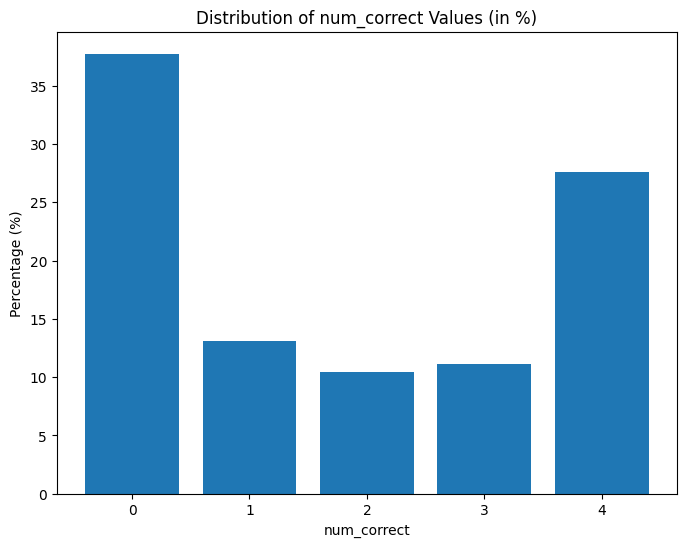

In [1]:
import json
from collections import Counter
import matplotlib.pyplot as plt

# Specify the file path
file_path = '/data/users/kevihuang/projects/Open-Reasoner-Zero/data/orz_math_57k_collected_w_num_correct.json'

# Load the JSON data from the file
with open(file_path, 'r') as f:
    data = json.load(f)

# Extract num_correct values from each data entry
num_correct_list = []
for entry in data:
    # Each entry is assumed to be a list of dictionaries.
    for item in entry:
        if item.get("from") == "assistant" and "num_correct" in item:
            num_correct_list.append(item["num_correct"])
            break  # Stop after finding the first assistant item in this entry

# Compute the frequency distribution using Counter
distribution = Counter(num_correct_list)

# Calculate total count to convert frequencies to percentages
total = len(num_correct_list)

# Ensure that all values from 0 to 4 are present in the distribution (set missing keys to 0)
num_correct_range = list(range(5))
freq_values = [distribution.get(i, 0) for i in num_correct_range]

# Convert frequencies to percentages
percent_values = [(freq / total) * 100 for freq in freq_values]

# Visualize the distribution as percentages
plt.figure(figsize=(8, 6))
plt.bar(num_correct_range, percent_values, tick_label=num_correct_range)
plt.xlabel("num_correct")
plt.ylabel("Percentage (%)")
plt.title("Distribution of num_correct Values (in %)")
plt.show()


In [10]:
# Save the easiest 50% of questions

import json

# Define file paths for input and output
input_file = '/data/users/kevihuang/projects/Open-Reasoner-Zero/data/orz_math_57k_collected_w_num_correct.json'
output_file = '/data/users/kevihuang/projects/Open-Reasoner-Zero/data/orz_math_57k_collected_w_num_correct_easiest_half.json'

# Load the original dataset
with open(input_file, 'r') as f:
    data = json.load(f)
print(len(data))

# Filter entries: for each entry (assumed to be a list of dictionaries), 
# include it only if the first assistant item with "num_correct" has a value 
# not equal to 0 or 1.
filtered_data = []
for entry in data:
    for item in entry:
        if "num_correct" in item:
            if item["num_correct"] not in [0, 1]:
                filtered_data.append(entry)
            break  # Stop after processing the first assistant item

# Save the filtered dataset to the new file
with open(output_file, 'w') as f:
    json.dump(filtered_data, f, indent=2)

# Print the number of entries in the filtered dataset
print("Length of filtered dataset:", len(filtered_data))


56878
Length of filtered dataset: 33365


# DeepMath dataset

In [3]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): Traceback (most recent call last):
  File "/data/users/kevihuang/projects/Open-Reasoner-Zero/venv/bin/huggingface-cli", line 8, in <module>
    sys.exit(main())
  File "/scratch/AzureNfsServer_INPUT1/data/users/kevihuang/projects/Open-Reasoner-Zero/venv/lib/python3.10/site-p

In [4]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("zwhe99/DeepMath-103K")

Generating train split: 100%|██████████| 103110/103110 [00:05<00:00, 17895.54 examples/s]


In [6]:
ds

DatasetDict({
    train: Dataset({
        features: ['question', 'final_answer', 'difficulty', 'topic', 'r1_solution_1', 'r1_solution_2', 'r1_solution_3'],
        num_rows: 103110
    })
})

In [8]:
import os
import json

conversations = []
for rec in ds["train"]:
    # 1) human turn
    human = {
        "from": "human",
        "value": rec["question"]
    }
    # 2) assistant stub
    assistant = {
        "from": "assistant",
        "ground_truth": {"value": rec["final_answer"]},
        "num_correct": -1 # no GT
    }
    # 3) original record
    record = dict(rec)  # make sure it's a plain dict

    conversations.append([human, assistant, record])

# make sure output dir exists
out_path = "/data/users/kevihuang/projects/Open-Reasoner-Zero/data/deepmath_103k.json"
os.makedirs(os.path.dirname(out_path), exist_ok=True)

# write the file
with open(out_path, "w", encoding="utf-8") as f:
    json.dump(conversations, f, ensure_ascii=False, indent=2)

print(f"✅ Saved {len(conversations)} records to {out_path}")


✅ Saved 103110 records to /data/users/kevihuang/projects/Open-Reasoner-Zero/data/deepmath_103k.json


In [9]:
conversations[0]

[{'from': 'human',
  'value': 'Evaluate the limit: \\[ \\lim_{x \\to \\infty} \\sqrt{x} \\left( \\sqrt[3]{x+1} - \\sqrt[3]{x-1} \\right) \\]'},
 {'from': 'assistant', 'ground_truth': {'value': '0'}, 'num_correct': -1},
 {'question': 'Evaluate the limit: \\[ \\lim_{x \\to \\infty} \\sqrt{x} \\left( \\sqrt[3]{x+1} - \\sqrt[3]{x-1} \\right) \\]',
  'final_answer': '0',
  'difficulty': 4.5,
  'topic': 'Mathematics -> Precalculus -> Limits',
  'r1_solution_1': "Okay, so I have this limit to evaluate: the limit as x approaches infinity of the square root of x times the difference between the cube root of (x plus 1) and the cube root of (x minus 1). Hmm, let me write that down again to make sure I have it right.\n\n\\[\n\\lim_{x \\to \\infty} \\sqrt{x} \\left( \\sqrt[3]{x+1} - \\sqrt[3]{x-1} \\right)\n\\]\n\nAlright, so it's the product of sqrt(x) and the difference of two cube roots. Since x is going to infinity, both x+1 and x-1 are going to be very close to x when x is large. But their cub

In [2]:
import json

with open('/data/users/kevihuang/projects/Open-Reasoner-Zero/data/deepmath_103k.json', 'r') as f:
    data = json.load(f)

len(data)

103110

In [2]:
data[0]

[{'from': 'human',
  'value': 'Evaluate the limit: \\[ \\lim_{x \\to \\infty} \\sqrt{x} \\left( \\sqrt[3]{x+1} - \\sqrt[3]{x-1} \\right) \\]'},
 {'from': 'assistant', 'ground_truth': {'value': '0'}, 'num_correct': -1},
 {'question': 'Evaluate the limit: \\[ \\lim_{x \\to \\infty} \\sqrt{x} \\left( \\sqrt[3]{x+1} - \\sqrt[3]{x-1} \\right) \\]',
  'final_answer': '0',
  'difficulty': 4.5,
  'topic': 'Mathematics -> Precalculus -> Limits',
  'r1_solution_1': "Okay, so I have this limit to evaluate: the limit as x approaches infinity of the square root of x times the difference between the cube root of (x plus 1) and the cube root of (x minus 1). Hmm, let me write that down again to make sure I have it right.\n\n\\[\n\\lim_{x \\to \\infty} \\sqrt{x} \\left( \\sqrt[3]{x+1} - \\sqrt[3]{x-1} \\right)\n\\]\n\nAlright, so it's the product of sqrt(x) and the difference of two cube roots. Since x is going to infinity, both x+1 and x-1 are going to be very close to x when x is large. But their cub

In [4]:
data[0][2]['difficulty']

4.5

In [5]:
# Count how many items meet the difficulty condition
num_hard = sum(1 for item in data if item[2]['difficulty'] >= 6)

# Compute the percentage
percentage_hard = (num_hard / len(data)) * 100 if data else 0

print(f"Percentage with difficulty >= 6: {percentage_hard:.2f}%")


Percentage with difficulty >= 6: 55.89%


In [6]:
# Count how many items meet the difficulty condition
num_hard = sum(1 for item in data if item[2]['difficulty'] >= 7)

# Compute the percentage
percentage_hard = (num_hard / len(data)) * 100 if data else 0

print(f"Percentage with difficulty >= 7: {percentage_hard:.2f}%")


Percentage with difficulty >= 7: 31.41%


In [ ]:
# Count how many items meet the difficulty condition
num_hard = sum(1 for item in data if item[2]['difficulty'] >= 7)

# Compute the percentage
percentage_hard = (num_hard / len(data)) * 100 if data else 0

print(f"Percentage with difficulty >= 7: {percentage_hard:.2f}%")

Percentage with difficulty >= 7: 31.41%


# Checking out the OpenMathReasoning dataset to get more difficult questions than DeepMath

In [1]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("nvidia/OpenMathReasoning")

/data/users/kevihuang/projects/Open-Reasoner-Zero/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating genselect split: 100%|██████████| 565620/565620 [00:08<00:00, 62864.97 examples/s]


In [2]:
ds

DatasetDict({
    cot: Dataset({
        features: ['expected_answer', 'problem_type', 'problem_source', 'generation_model', 'pass_rate_72b_tir', 'problem', 'generated_solution', 'inference_mode'],
        num_rows: 3201061
    })
    tir: Dataset({
        features: ['expected_answer', 'problem_type', 'problem_source', 'generation_model', 'pass_rate_72b_tir', 'problem', 'generated_solution', 'inference_mode'],
        num_rows: 1703010
    })
    genselect: Dataset({
        features: ['expected_answer', 'problem_type', 'problem_source', 'generation_model', 'pass_rate_72b_tir', 'problem', 'generated_solution', 'inference_mode'],
        num_rows: 565620
    })
})

In [24]:
from collections import Counter

for split_name, dataset in ds.items():
    total = dataset.num_rows
    # get a list of all problem_type values in this split
    types = dataset["problem_type"]
    counts = Counter(types)
    
    print(f"\n=== {split_name} (total {total}) ===")
    for ptype, cnt in counts.items():
        pct = cnt / total * 100
        print(f"{ptype:20s}: {cnt:7d} ({pct:5.2f}%)")


=== cot (total 3201061) ===
has_answer_extracted: 1896151 (59.24%)
no_answer_extracted :  838506 (26.19%)
converted_proof     :  466404 (14.57%)

=== tir (total 1703010) ===
has_answer_extracted: 1703010 (100.00%)

=== genselect (total 565620) ===
converted_proof     :  234627 (41.48%)
has_answer_extracted:  180948 (31.99%)
no_answer_extracted :  150045 (26.53%)


In [ ]:
import os
import json
from datasets import DatasetDict
from tqdm.auto import tqdm

seen = set()
conversations = []

for split_name, split_ds in ds.items():
    if split_name == "cot": # only use cot for now (no tool integration problems, nor evaluation of selecting the most promising solution out of many candidates for now - strictly problem solving questions for now)
        # use len(split_ds) for total so tqdm can show “n/M” 
        for rec in tqdm(split_ds, 
                        desc=f"Processing {split_name}", 
                        total=len(split_ds), 
                        unit="rec"):
            pair = (rec["problem"], rec["expected_answer"])
            if pair in seen:
                continue
            if rec["problem_type"] != "has_answer_extracted":
                continue
            seen.add(pair)

            human = {
                "from": "human",
                "value": rec["problem"]
            }
            assistant = {
                "from": "assistant",
                "ground_truth": {"value": rec["expected_answer"]},
                "num_correct": -1
            }
            record = dict(rec)  # plain dict copy

            conversations.append([human, assistant, record])

out_path = "/vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only.json"
os.makedirs(os.path.dirname(out_path), exist_ok=True)

with open(out_path, "w", encoding="utf-8") as f:
    json.dump(conversations, f, ensure_ascii=False, indent=2)

print(f"✅ Saved {len(conversations)} unique records to {out_path}") # Saved 873718 unique records to /vc_data_blob/users/kevihuang/data/orz/openmathreasoning.json # 15 mins

/data/users/kevihuang/projects/Open-Reasoner-Zero/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'ds' is not defined

In [7]:
len(conversations)

100

In [28]:
out_path = "/vc_data_blob/users/kevihuang/data/orz/openmathreasoning_random_100__cot__has_answer_extracted_only.json"
os.makedirs(os.path.dirname(out_path), exist_ok=True)

import random
random.seed(42)  # for reproducibility

conversations_100 = random.sample(conversations, 100)  # sample 100 unique records

with open(out_path, "w", encoding="utf-8") as f:
    json.dump(conversations_100, f, ensure_ascii=False, indent=2)

print(f"✅ Saved {len(conversations_100)} unique records to {out_path}") 

✅ Saved 100 unique records to /vc_data_blob/users/kevihuang/data/orz/openmathreasoning_random_100__cot__has_answer_extracted_only.json


In [1]:
conversations_path = "/vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only.json"

import json

with open(conversations_path, "r", encoding="utf-8") as f:
    conversations = json.load(f)
len(conversations), conversations[0]

(126092,
 [{'from': 'human',
   'value': 'Given a group of \\( N \\) balls consisting of \\( C \\) colors, where the number of balls in each color is represented as \\( n_1, n_2, \\ldots, n_C \\) (with \\( n_1 + n_2 + \\ldots + n_C = N \\)), what is the probability that when \\( A \\) balls are randomly picked (where \\( A \\leq N \\)), the picked balls consist of \\( a_1, a_2, \\ldots, a_C \\) balls of each color, where \\( a_1 + a_2 + \\ldots + a_C = A \\)?'},
  {'from': 'assistant',
   'ground_truth': {'value': '\\(\\frac{C_{n_1}^{a_1} \\cdot C_{n_2}^{a_2} \\cdot \\ldots \\cdot C_{n_C}^{a_C}}{C_N^A}\\)'},
   'num_correct': -1},
  {'expected_answer': '\\(\\frac{C_{n_1}^{a_1} \\cdot C_{n_2}^{a_2} \\cdot \\ldots \\cdot C_{n_C}^{a_C}}{C_N^A}\\)',
   'problem_type': 'has_answer_extracted',
   'problem_source': 'aops_c6_high_school_olympiads',
   'generation_model': 'DeepSeek-R1',
   'pass_rate_72b_tir': '0.65625',
   'problem': 'Given a group of \\( N \\) balls consisting of \\( C \\) co

In [2]:
import json

conversations_path = "/vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only.json"

# Load the conversations
with open(conversations_path, "r", encoding="utf-8") as f:
    conversations = json.load(f)

# Filter out entries where pass_rate_72b_tir is "n/a" or 0.0
filtered = []
for entry in conversations:
    meta = entry[2]
    rate = meta.get("pass_rate_72b_tir", "n/a")
    try:
        rate_val = float(rate)
    except (TypeError, ValueError):
        # skip if not a number
        continue
    if rate_val == 0.0:
        continue
    filtered.append(entry)

# Save back to the same path (you may want to back up first!)
with open("/vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only__no_na__no_zero_pass.json", "w", encoding="utf-8") as f:
    json.dump(filtered, f, ensure_ascii=False, indent=2)

print(f"Filtered out {len(conversations) - len(filtered)} entries; {len(filtered)} remain.")

Filtered out 19743 entries; 106349 remain.


In [4]:
# Verify that every entry in `filtered` has 0.0 < pass_rate <= 1.0
invalid = []
for idx, dialogue in enumerate(filtered):
    rate_str = dialogue[2].get("pass_rate_72b_tir", "")
    try:
        rate = float(rate_str)
    except ValueError:
        invalid.append((idx, rate_str))
        continue
    if not (0.0 < rate < 1.0):
        invalid.append((idx, rate))

if invalid:
    print("Found entries with invalid pass_rate_72b_tir:")
    for idx, val in invalid:
        print(f"  index {idx}: {val!r}")
else:
    print("All entries have 0.0 < pass_rate_72b_tir <= 1.0")


All entries have 0.0 < pass_rate_72b_tir <= 1.0


In [7]:
import json

# Assuming `filtered` is already defined as in your previous snippet.

# Compute the lowest pass rate
rates = [float(dialogue[2]['pass_rate_72b_tir']) for dialogue in filtered]
min_rate = min(rates)
print(f"Lowest pass rate: {min_rate}")

# Find and print one example with that pass rate
for dialogue in filtered:
    if float(dialogue[2]['pass_rate_72b_tir']) == min_rate:
        print("Example with the lowest pass rate:")
        print(json.dumps(dialogue, indent=2, ensure_ascii=False))
        break


Lowest pass rate: 0.03125
Example with the lowest pass rate:
[
  {
    "from": "human",
    "value": "Find all values of $1^{\\pi}$."
  },
  {
    "from": "assistant",
    "ground_truth": {
      "value": "\\(1^{\\pi} = \\cos(2n\\pi^2) + i\\sin(2n\\pi^2)\\) for \\(n \\in \\mathbb{Z}\\)"
    },
    "num_correct": -1
  },
  {
    "expected_answer": "\\(1^{\\pi} = \\cos(2n\\pi^2) + i\\sin(2n\\pi^2)\\) for \\(n \\in \\mathbb{Z}\\)",
    "problem_type": "has_answer_extracted",
    "problem_source": "aops_c6_high_school_olympiads",
    "generation_model": "QwQ-32B",
    "pass_rate_72b_tir": "0.03125",
    "problem": "Find all values of $1^{\\pi}$.",
    "generated_solution": "<think>\nOkay, so I need to figure out all the values of 1 raised to the power of π. Hmm, I remember that when dealing with complex numbers, exponentiation can have multiple values because of the periodic nature of angles in polar form. Let me think step by step.\n\nFirst, normally, in real numbers, 1 to any real power 

In [15]:
# Save the easiest_half where float(dialogue[2]['pass_rate_72b_tir']) <= 0.625 to "/vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only__easiest_half.json"

import json
from tqdm import tqdm

# Paths
output_path = "/vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only__easiest_half.json"

# Filter to those with pass_rate_72b_tir ≤ 0.625
easiest_half = []
for dialogue in tqdm(conversations, desc="Filtering easiest half"):
    record = dialogue[2]
    try:
        if float(record.get("pass_rate_72b_tir", 0)) > 0.625:
            easiest_half.append(dialogue)
    except ValueError:
        # skip entries where pass_rate isn't parseable
        continue

print(len(easiest_half), "dialogues with pass_rate_72b_tir <= 0.625 found.")

# Save filtered list
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(easiest_half, f, ensure_ascii=False, indent=2)

print(f"Saved {len(easiest_half)} dialogues to {output_path}")

Filtering easiest half: 100%|██████████| 126092/126092 [00:00<00:00, 1481714.01it/s]


54758 dialogues with pass_rate_72b_tir <= 0.625 found.
Saved 54758 dialogues to /vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only__easiest_half.json


In [14]:
# Jupyter cell to compute the % of dialogues with non‐numeric ("n/a", etc.) pass rates

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

total = len(conversations)
unparsable_count = sum(
    1 for dialogue in conversations
    if not is_number(dialogue[2].get("pass_rate_72b_tir", ""))
)
unparsable_pct = unparsable_count / total * 100

print(f"Unparsable pass_rate entries: {unparsable_count}/{total} ({unparsable_pct:.2f}% of total)")


Unparsable pass_rate entries: 6650/126092 (5.27% of total)


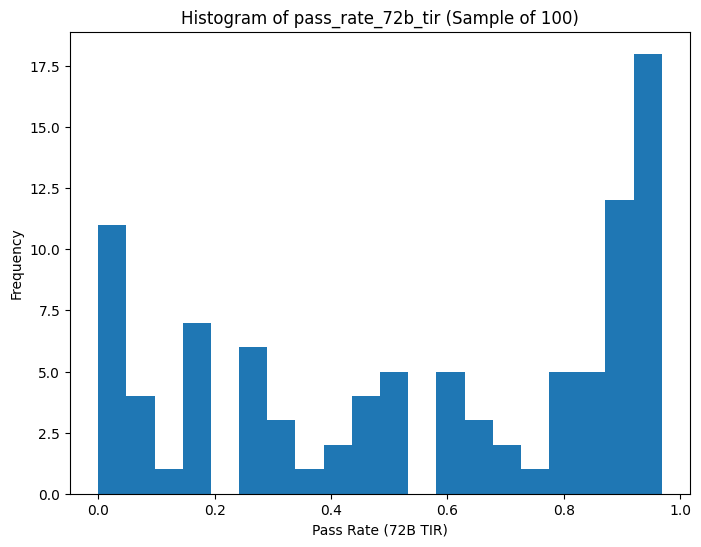

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract pass_rate_72b_tir from each record in conversations
rates = [entry[2]["pass_rate_72b_tir"] for entry in conversations]

# Wrap in a Series so dropna works
rates_series = pd.Series(rates)

# Coerce to numeric and drop non-numeric entries
rates_numeric = pd.to_numeric(rates_series, errors="coerce").dropna()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(rates_numeric, bins=20)
plt.title("Histogram of pass_rate_72b_tir (Sample of 100)")
plt.xlabel("Pass Rate (72B TIR)")
plt.ylabel("Frequency")
plt.show()


In [6]:
# 1) Using quantile:
quartiles = rates_numeric.quantile([0.25, 0.5, 0.75])
print(quartiles)
# you’ll see something like:
# 0.25    0.125
# 0.50    0.250
# 0.75    0.375
# dtype: float64

# 2) Or a one-stop summary:
print(rates_numeric.describe())
# which will include count, mean, std, min, 25%, 50%, 75%, max.

0.25    0.250000
0.50    0.625000
0.75    0.890625
dtype: float64
count    95.000000
mean      0.559539
std       0.346192
min       0.000000
25%       0.250000
50%       0.625000
75%       0.890625
max       0.968750
dtype: float64


In [29]:
from collections import Counter

# 1) Count
ptype_counts = Counter(rec[2]["problem_type"] for rec in conversations)
total = len(conversations)

print(f"Total unique COT conversations: {total}\n")
for ptype, cnt in ptype_counts.items():
    pct = cnt / total * 100
    print(f"{ptype:20s}: {cnt:7d} ({pct:5.2f}%)")

# 2) Grab one example per type
examples = {}
for human, assistant, record in conversations:
    ptype = record["problem_type"]
    if ptype not in examples:
        examples[ptype] = (human, assistant, record)
    # stop early if we've seen them all
    if len(examples) == len(ptype_counts):
        break

print("\nOne example per problem_type:\n")
for ptype, (human, assistant, record) in examples.items():
    print(f"--- {ptype} ---")
    print("Problem:        ", human["value"])
    print("Expected answer:", assistant["ground_truth"]["value"])
    print()


Total unique COT conversations: 126092

has_answer_extracted:  126092 (100.00%)

One example per problem_type:

--- has_answer_extracted ---
Problem:         Given a group of \( N \) balls consisting of \( C \) colors, where the number of balls in each color is represented as \( n_1, n_2, \ldots, n_C \) (with \( n_1 + n_2 + \ldots + n_C = N \)), what is the probability that when \( A \) balls are randomly picked (where \( A \leq N \)), the picked balls consist of \( a_1, a_2, \ldots, a_C \) balls of each color, where \( a_1 + a_2 + \ldots + a_C = A \)?
Expected answer: \(\frac{C_{n_1}^{a_1} \cdot C_{n_2}^{a_2} \cdot \ldots \cdot C_{n_C}^{a_C}}{C_N^A}\)



In [21]:
print(conversations[0][0]['value'])

Given a group of \( N \) balls consisting of \( C \) colors, where the number of balls in each color is represented as \( n_1, n_2, \ldots, n_C \) (with \( n_1 + n_2 + \ldots + n_C = N \)), what is the probability that when \( A \) balls are randomly picked (where \( A \leq N \)), the picked balls consist of \( a_1, a_2, \ldots, a_C \) balls of each color, where \( a_1 + a_2 + \ldots + a_C = A \)?


In [22]:
conversations[0][1]

{'from': 'assistant',
 'ground_truth': {'value': '\\(\\frac{C_{n_1}^{a_1} \\cdot C_{n_2}^{a_2} \\cdot \\ldots \\cdot C_{n_C}^{a_C}}{C_N^A}\\)'},
 'num_correct': -1}

In [23]:
conversations[0][2]

{'expected_answer': '\\(\\frac{C_{n_1}^{a_1} \\cdot C_{n_2}^{a_2} \\cdot \\ldots \\cdot C_{n_C}^{a_C}}{C_N^A}\\)',
 'problem_type': 'has_answer_extracted',
 'problem_source': 'aops_c6_high_school_olympiads',
 'generation_model': 'DeepSeek-R1',
 'pass_rate_72b_tir': '0.65625',
 'problem': 'Given a group of \\( N \\) balls consisting of \\( C \\) colors, where the number of balls in each color is represented as \\( n_1, n_2, \\ldots, n_C \\) (with \\( n_1 + n_2 + \\ldots + n_C = N \\)), what is the probability that when \\( A \\) balls are randomly picked (where \\( A \\leq N \\)), the picked balls consist of \\( a_1, a_2, \\ldots, a_C \\) balls of each color, where \\( a_1 + a_2 + \\ldots + a_C = A \\)?',
 'generated_solution': "<think>\nOkay, so I need to find the probability that when I pick A balls out of N, where there are C different colors, the number of each color I pick is exactly a1, a2, ..., aC. Hmm, let's think about how to approach this.\n\nFirst, probability problems often 

### Curating a 3K subset of the 100K to prove that adaptive training works

In [ ]:
import json
import random

# set seed for reproducibility
random.seed(42)

# file paths
src_path = "/vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only__no_na__no_zero_pass.json"
dst_path = "/vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only__no_na__no_zero_pass_random_3K.json"

# load the full dataset
with open(src_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# sample 3,000 items
sampled = random.sample(data, 3000)

# write out the sample
with open(dst_path, "w", encoding="utf-8") as f:
    json.dump(sampled, f, ensure_ascii=False, indent=2)

print(f"Saved {len(sampled)} randomly sampled items to {dst_path}")

Saved 3000 randomly sampled items to /vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only__no_na__no_zero_pass_random_3K.json


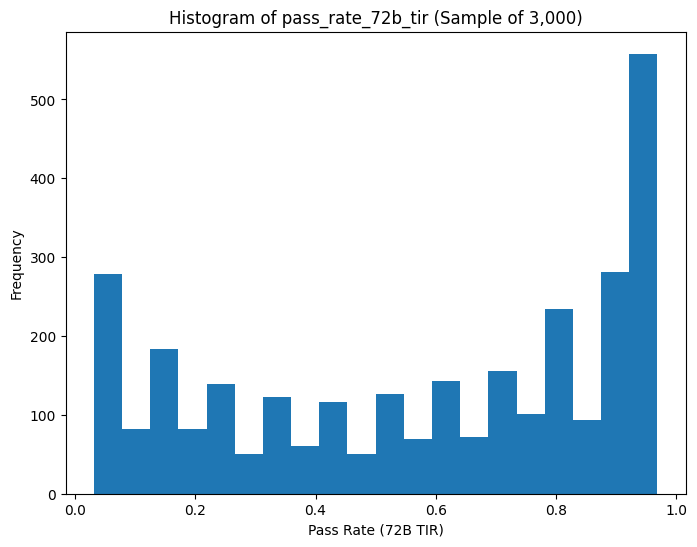

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the 3K-sample dataset
sample_path = "/vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only__no_na__no_zero_pass_random_3K.json"
with open(sample_path, "r", encoding="utf-8") as f:
    conversations = json.load(f)

# Extract pass_rate_72b_tir from each record
rates = [entry[2]["pass_rate_72b_tir"] for entry in conversations]

# Create a Series to leverage dropna
rates_series = pd.Series(rates)
rates_numeric = pd.to_numeric(rates_series, errors="coerce").dropna()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(rates_numeric, bins=20)
plt.title("Histogram of pass_rate_72b_tir (Sample of 3,000)")
plt.xlabel("Pass Rate (72B TIR)")
plt.ylabel("Frequency")
plt.show()


In [5]:
import json
import numpy as np
from tqdm import tqdm

# Paths
sample_path = "/vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only__no_na__no_zero_pass_random_3K.json"
output_path = "/vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only__no_na__no_zero_pass_random_3K_easiest_half_n_1500.json"

# 1) Load the sample
with open(sample_path, "r", encoding="utf-8") as f:
    conversations = json.load(f)

# 2) Extract pass rates and compute median
rates = []
for dialogue in conversations:
    pr = dialogue[2].get("pass_rate_72b_tir", None)
    try:
        rates.append(float(pr))
    except (TypeError, ValueError):
        continue

median_rate = float(np.median(rates))
print(f"Median pass_rate_72b_tir: {median_rate:.4f}")

# 3) Filter to those ≤ median
easiest_half = []
for dialogue in tqdm(conversations, desc="Filtering easiest half"):
    try:
        if float(dialogue[2].get("pass_rate_72b_tir", 0)) > median_rate:
            easiest_half.append(dialogue)
    except ValueError:
        continue

print(f"Found {len(easiest_half)} dialogues with pass_rate ≤ {median_rate:.4f}")

# 4) Save the filtered list
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(easiest_half, f, ensure_ascii=False, indent=2)

print(f"Saved {len(easiest_half)} dialogues to {output_path}")


Median pass_rate_72b_tir: 0.6250


Filtering easiest half: 100%|██████████| 3000/3000 [00:00<00:00, 1651300.79it/s]

Found 1496 dialogues with pass_rate ≤ 0.6250


Saved 1496 dialogues to /vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only__no_na__no_zero_pass_random_3K_easiest_half_n_1500.json


In [17]:
import json
import numpy as np

# 1) Load the 3K sample
sample_path = "/vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only__no_na__no_zero_pass_random_3K.json"
with open(sample_path, "r", encoding="utf-8") as f:
    conversations = json.load(f)

# 2) Extract numeric pass rates
rates = []
for dialogue in conversations:
    pr = dialogue[2].get("pass_rate_72b_tir", None)
    try:
        rates.append(float(pr))
    except (TypeError, ValueError):
        continue

# 3) Compute thresholds
th_5  = np.percentile(rates, 90)  # easiest top 5%
th_10 = np.percentile(rates, 80)  # easiest top 10%
th_25 = np.percentile(rates, 70)  # easiest top 25%

print(f"Easiest 5% threshold  (95th pctile): {th_5:.4f}")
print(f"Easiest 10% threshold (90th pctile): {th_10:.4f}")
print(f"Easiest 25% threshold (75th pctile): {th_25:.4f}")


Easiest 5% threshold  (95th pctile): 0.9688
Easiest 10% threshold (90th pctile): 0.9062
Easiest 25% threshold (75th pctile): 0.8438


In [22]:
import json

# 1) Load the 3K-sample dataset
sample_path = "/vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only__no_na__no_zero_pass_random_3K.json"
with open(sample_path, "r", encoding="utf-8") as f:
    conversations = json.load(f)

# 2) Extract and clean pass rates
rates = []
for dialogue in conversations:
    pr = dialogue[2].get("pass_rate_72b_tir", None)
    try:
        rates.append(float(pr))
    except (TypeError, ValueError):
        continue

total = len(rates)
print(f"Total valid pass_rate entries: {total}")

# 3) Compute and print percentages
for threshold in (0.96, 0.90, 0.84):
    count = sum(1 for r in rates if r > threshold)
    pct = (count / total * 100) if total else 0.0
    print(f"pass_rate_72b_tir > {threshold:.2f}: {count}/{total} = {pct:.2f}%")


Total valid pass_rate entries: 3000
pass_rate_72b_tir > 0.96: 334/3000 = 11.13%
pass_rate_72b_tir > 0.90: 723/3000 = 24.10%
pass_rate_72b_tir > 0.84: 933/3000 = 31.10%


# Curating a subset of 3K problems where the answers are all floats

In [6]:
import json
import random

# set seed for reproducibility
random.seed(42)

# file paths
src_path = "/vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only__no_na__no_zero_pass.json"
dst_path = "/vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only__no_na__no_zero_pass__ans_int__random_3K.json"

# load the full dataset
with open(src_path, "r", encoding="utf-8") as f:
    data = json.load(f)

In [7]:
len(data), data[0]

(106349,
 [{'from': 'human',
   'value': 'Given a group of \\( N \\) balls consisting of \\( C \\) colors, where the number of balls in each color is represented as \\( n_1, n_2, \\ldots, n_C \\) (with \\( n_1 + n_2 + \\ldots + n_C = N \\)), what is the probability that when \\( A \\) balls are randomly picked (where \\( A \\leq N \\)), the picked balls consist of \\( a_1, a_2, \\ldots, a_C \\) balls of each color, where \\( a_1 + a_2 + \\ldots + a_C = A \\)?'},
  {'from': 'assistant',
   'ground_truth': {'value': '\\(\\frac{C_{n_1}^{a_1} \\cdot C_{n_2}^{a_2} \\cdot \\ldots \\cdot C_{n_C}^{a_C}}{C_N^A}\\)'},
   'num_correct': -1},
  {'expected_answer': '\\(\\frac{C_{n_1}^{a_1} \\cdot C_{n_2}^{a_2} \\cdot \\ldots \\cdot C_{n_C}^{a_C}}{C_N^A}\\)',
   'problem_type': 'has_answer_extracted',
   'problem_source': 'aops_c6_high_school_olympiads',
   'generation_model': 'DeepSeek-R1',
   'pass_rate_72b_tir': '0.65625',
   'problem': 'Given a group of \\( N \\) balls consisting of \\( C \\) co

In [8]:
# filter out entries where x['expected_answer'] cannot be converted to a float
def is_float(value):
    try:
        int(value)
        return True
    except (ValueError, TypeError):
        return False
    
data = [
    entry for entry in data
    if is_float(entry[1]["ground_truth"]["value"])
]
print(f"Filtered dataset size: {len(data)}")

# sample 3,000 items
sampled = random.sample(data, 3000)

# write out the sample
with open(dst_path, "w", encoding="utf-8") as f:
    json.dump(sampled, f, ensure_ascii=False, indent=2)

print(f"Saved {len(sampled)} randomly sampled items to {dst_path}")

Filtered dataset size: 34687
Saved 3000 randomly sampled items to /vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only__no_na__no_zero_pass__ans_int__random_3K.json


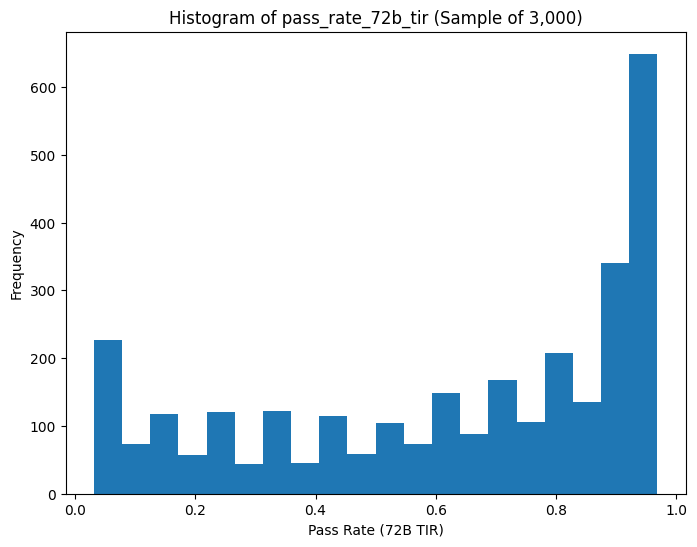

In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the 3K-sample dataset
sample_path = "/vc_data_blob/users/kevihuang/data/orz/openmathreasoning__cot__has_answer_extracted_only__no_na__no_zero_pass__ans_int__random_3K.json"
with open(sample_path, "r", encoding="utf-8") as f:
    conversations = json.load(f)

# Extract pass_rate_72b_tir from each record
rates = [entry[2]["pass_rate_72b_tir"] for entry in conversations]

# Create a Series to leverage dropna
rates_series = pd.Series(rates)
rates_numeric = pd.to_numeric(rates_series, errors="coerce").dropna()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(rates_numeric, bins=20)
plt.title("Histogram of pass_rate_72b_tir (Sample of 3,000)")
plt.xlabel("Pass Rate (72B TIR)")
plt.ylabel("Frequency")
plt.show()
